In [42]:
import matplotlib.pyplot as plt
import os
import json

from utils_graph_generation import get_paths,load_graph
from utils_graph_plot import get_all_markers
from tqdm import tqdm
from utils_graph_metrics import tresh_normalization, calc_avg_degree, convert_keys_to_float

In [43]:
# Seleccionamos el modo con el que queremos crear nuestra red: Hashtags como nodos o usuarios como nodos o bipartita
MODE = "hashtag"

# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 50

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos las horas que queremos estudiar

MANIFESTACION = "nat"
# Hora critica NaT
arr_horas = ["429624", "429586", "429600", "429606"]

#MANIFESTACION = "9n"
# Hora critica 9n
#arr_horas = ["437037", "437023", "437053"]

# TODO, no deberia normalizar el diccioanrio al final para que sea la figura 2a????
dict_horas = {}
for hora in arr_horas:
    dict_hora = {}
    graphs_folder, plots_folder, measures_name = get_paths(MODE, MANIFESTACION, metric="degree", hora=hora)
    if os.path.exists(measures_name + '_avg_deg.json'):
        try:
            with open(measures_name + '_avg_deg.json', 'r') as f:
                dict_hora = json.load(f)
            dict_hora = convert_keys_to_float(dict_hora)
        except json.JSONDecodeError:
            dict_hora = {}
    G = load_graph(hora, graphs_folder)
    arr_medium_deg = []
    for treshold in tqdm(range(MAX_UMBRAL)):
        treshold = float(treshold)
        if not treshold in dict_hora.keys():
            # Creamos el subgrafo basándonos en el treshold seleccionado
            F = tresh_normalization(G, treshold)
            """if treshold == 0:
                print(F.number_of_edges(), F.number_of_nodes(), calc_avg_degree(F), G.number_of_edges(), G.number_of_nodes(), calc_avg_degree(G))"""
            if F == -1:
                # Caso de grafo vacío o grafo inconexo
                break 
            #TODO para ejecutar sobre gráfica cugraph https://github.com/rapidsai/cugraph/tree/branch-24.06/python/nx-cugraph
            # diccionario[nodo] = coeficiente de clusterización del nodo https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering
            """if treshold == 0:
                dict_hora[treshold] = calc_avg_degree(G)
            else:"""
            dict_hora[treshold] = calc_avg_degree(F)
    with open(measures_name + '_avg_deg.json', "w") as f:
        json.dump(dict_hora, f, indent=2)
    dict_horas[hora] = dict_hora

graphs2/nodes_hashtag/nat/429624.gexf
Cargado el grafo de la hora 429624, numero de nodos: 642, numero de aristas: 4470


100%|██████████| 50/50 [00:00<00:00, 1426634.01it/s]


graphs2/nodes_hashtag/nat/429586.gexf
Cargado el grafo de la hora 429586, numero de nodos: 180, numero de aristas: 428


 48%|████▊     | 24/50 [00:00<00:00, 330043.59it/s]


graphs2/nodes_hashtag/nat/429600.gexf
Cargado el grafo de la hora 429600, numero de nodos: 459, numero de aristas: 1262


100%|██████████| 50/50 [00:00<00:00, 806596.92it/s]


graphs2/nodes_hashtag/nat/429606.gexf
Cargado el grafo de la hora 429606, numero de nodos: 56, numero de aristas: 97


 24%|██▍       | 12/50 [00:00<00:00, 238538.62it/s]


In [44]:
with_lines=True
dot_size=12
alpha=0.7

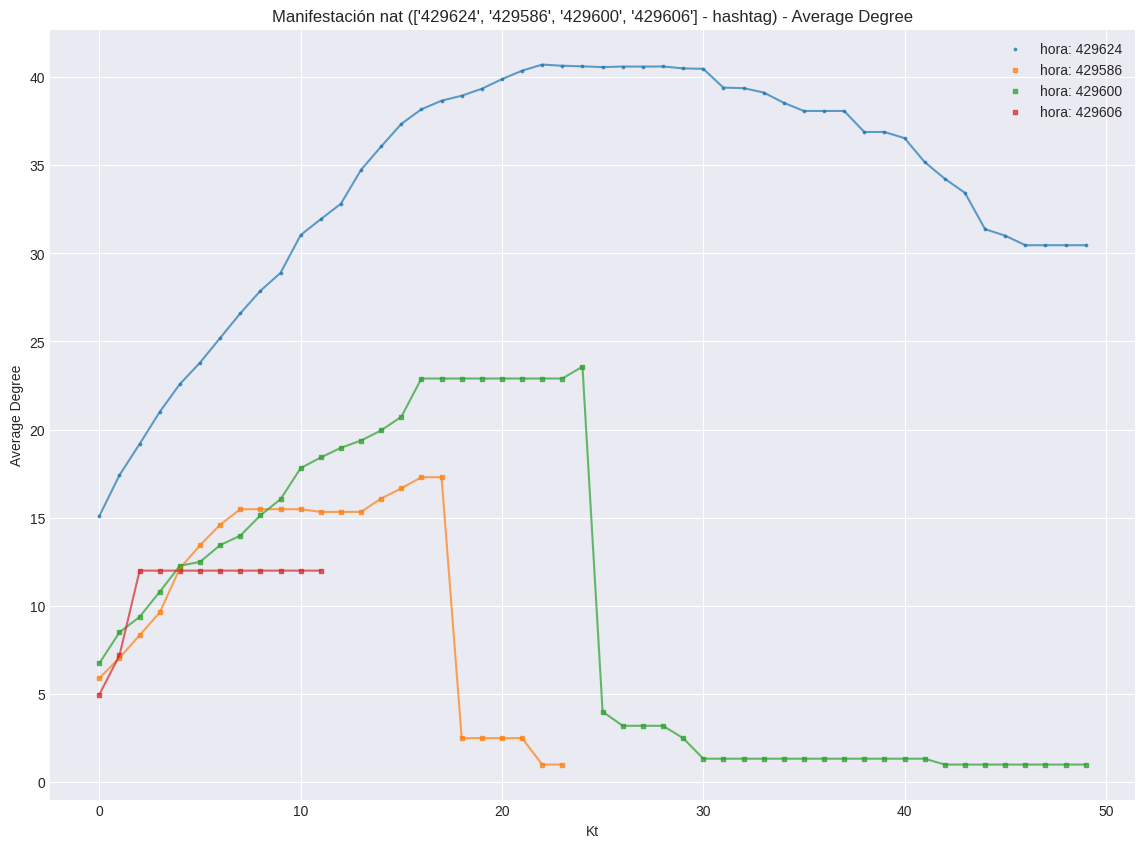

In [45]:
markers = get_all_markers()

fig = plt.figure(figsize=(14,10)) 
plt.style.use('seaborn-v0_8-darkgrid')


i = 0
for hora in dict_horas:
    points_x = dict_horas[hora].keys()
    points_y = dict_horas[hora].values()
    if with_lines:
        plt.plot(points_x, points_y, alpha=alpha)
    plt.scatter(points_x, points_y, alpha=alpha, s=dot_size, marker=markers[i], label=f'hora: {hora}')     
    i =+ 1   

plt.ylabel("Average Degree")
plt.xlabel("Kt")

plt.title("Manifestación " + MANIFESTACION + ' (' + str(arr_horas) + " - " + MODE +") - Average Degree")
plt.legend()
plt.savefig(plots_folder + hora + "_avg_deg - h " + str(arr_horas) + ".png")
plt.show()